# EML Decomposition for Likelihood-free Inference

### Combined EML for multiple sensors

This notebook will follow the notation used in R. Barlow's [*Extended maximum likelihood*](https://www.sciencedirect.com/science/article/pii/0168900290913348) and J. Lanfranchi's [*Likelihoods for Retro*](https://github.com/IceCubeOpenSource/retro/blob/master/notebooks/likelihood_function_derivation.ipynb) unless otherwise stated.

Barlow's Equation 5 expresses the extended likelihood as follows:

$L=\left[ \prod_{i=1}^{K} P(x_i) \right] e^{-\mathcal{N}}$, or 

$L=\left[ \prod_{i=1}^{K}  p(x_i) \right] \mathcal{N}^{K} e^{-\mathcal{N}}$

where $P(x_i) = \mathcal{N} p(x_i)$ and $p(x_i)$ is a probability density function (PDF) for the observable quantity $x$. Each $x_i$ is a separate observation, assumed to be drawn from the same PDF, and $\mathcal{N}$ is the expected number of observations or events. The shape of $p$ and the value of $\mathcal{N}$ are each dependent on an underlying hypothesis. When conducting parameter extraction, the underlying hypothesis is varied to optimize $L$.

In the context of photosensors, the above formulation of the extended likelihood applies most easily to a single sensor. Assuming this photosensor provides a variable length series of pulse times, the observable quantity $x$ would be the pulse time and $\mathcal{N}$ the expected number of pulses. Further, following the treatment by Lanfranchi, variable-charge hits will be accommodated by replacing $p(t_i)$ with $p(t)^{q_{d, i}}$ and $\mathcal{N}$ with $\Lambda_d$, where $q_{d, i}$ is the charge of pulse $i$ in detector $d$ and $\Lambda_d$ the total amount of charge expected in detector $d$. In this discussion, $\Lambda_d$ will include both noise and signal charge.

Therefore, the extended likelihood for sensor $d$ is

$L_d=\left[ \prod_{i} p_d\left(t_{d, i}\right)^{q_{d, i}} \right] \Lambda_{d} ^{Q_d} e^{-\Lambda_{d}}$, 

where $Q_d = \sum_i q_{d, i}$.

Assuming the observations for each detector fluctuate independently, the extended likelihood for all sensors is a product of the respective likelihoods for each individual sensor:

$L = \prod_{d=1}^{D_{tot}} L_d$,

$L = \prod_{d=1}^{D_{tot}} \left[\left(\prod_{i=1}^{K_d} p_d\left(t_{d, i}\right)^{q_{d, i}} \right
)\Lambda_{d} ^{Q_d} e^{-\Lambda_{d}}\right]$.

### DOM(net) formulation

Rearranging the terms of the combined likelihood, one obtains

$\boxed{L = \left[\prod_{d, i} p_d\left(t_{d, i}\right)^{q_{d, i}}\right] \cdot \left[\prod_{d=1}^{D_{tot}} \Lambda_{d} ^{Q_d} e^{-\Lambda_{d}} \right]}$

The term on the left is a product over all observed pulses, and the term on the right is a product over all sensors, including those that have observed 0 pulses. In the context of *freeDOM*, this formulation corresponds to a DOMnet approach, where the product over pulses is handled by hitnet and the product over sensors is handled by DOMnet. Recall that, in this case, $p_{d}\left(t\right)$ is the pulse time PDF for detector $d$ and satisfies $\int p_{d} \left(t\right) dt = 1$. In principle, one could train separate hitnets for each DOM and use them to evaluate the above expression.

### Total Charge(net) formulation

Defining the quantities $Q_{tot} = \Sigma_{d,i} q_{d, i}$ and $\Lambda_{tot} = \Sigma_d \Lambda_d$, the above DOM term can be rewritten as follows:

$\prod_{d=1}^{D_{tot}} \Lambda_{d} ^{Q_d} e^{-\Lambda_{d}} = \left[\prod_{d=1}^{D_{tot}} \Lambda_{d} ^{Q_d}\right]  e^{-\Lambda_{tot}}$,

$\prod_{d=1}^{D_{tot}} \Lambda_{d} ^{Q_d} e^{-\Lambda_{d}} = \left[\prod_{d,i}\Lambda_{d}^{q_{d, i}}\right]  e^{-\Lambda_{tot}}$

Again, $\prod_{d,i}$ is a product over all observed pulses. Continuing,

$\prod_{d=1}^{D_{tot}} \Lambda_{d} ^{Q_d} e^{-\Lambda_{d}} = \left[\prod_{d,i} \left(\frac{\Lambda_{tot}}{\Lambda_{tot}}\right)^{q_{d, i}}\Lambda_{d}^{q_{d, i}}\right]  e^{-\Lambda_{tot}}$

$\prod_{d=1}^{D_{tot}} \Lambda_{d} ^{Q_d} e^{-\Lambda_{d}} = \left[\prod_{d,i} \left(\frac{\Lambda_{d}}{\Lambda_{tot}}\right)^{q_{d, i}}\right] \Lambda_{tot}^{Q_{tot}} e^{-\Lambda_{tot}}$

The term outside of the brackets is a Poisson term for the total observed charge. Further, we are left with a number of factors of the form $\left(\frac{\Lambda_{d}}{\Lambda_{tot}}\right)^{q_{d, i}}$, one per pulse. These can be distributed to their associated terms in the product over all observed pulses as follows:

$L = \left[\prod_{d, i} p_d\left(t_{d, i}\right)^{q_{d, i}}\right] \cdot \left[\prod_{d,i} \left(\frac{\Lambda_{d}}{\Lambda_{tot}}\right)^{q_{d, i}}\right] \Lambda_{tot}^{Q_{tot}} e^{-\Lambda_{tot}}$

$L = \left\{\prod_{d, i} \left[\frac{\Lambda_{d}}{\Lambda_{tot}} p_d\left(t_{d, i}\right)\right]^{q_{d, i}}\right\} \cdot \left [\Lambda_{tot}^{Q_{tot}} e^{-\Lambda_{tot}}\right]$.

Defining $p_d^T\left(t\right) \equiv \frac{\Lambda_{d}}{\Lambda_{tot}} p_d\left(t_{d, i}\right)$, the above can be more concisely written as follows:

$\boxed{L = \left[\prod_{d, i} p^T_d\left(t_{d, i}\right)^{q_{d, i}}\right]\cdot \left [\Lambda_{tot}^{Q_{tot}} e^{-\Lambda_{tot}}\right]}$

The $T$ superscript distinguishes $p_d^T$ from $p_d$ and indicates that the former is intended to be used in the "total charge" formulation of the combined likelihood. The total charge formulation is algebraically equivalent to the DOM formulation, but groups terms in a conceptually different way. Rather than a product over all pulses and a product over all sensors, hit or not-hit, we have a product over all pulses and a single Poisson term for the total charge aggregated over all sensors. In the case where most sensors observe 0 pulses, this formulation may lend itself to more computationally efficient reconstructions. However, it is important to emphasize that the PDF used in the product over all pulses in the total charge formulation ($p_d^T$) is not the same as the one used in the DOM formulation ($p_d$). 

The change from $p_d$ to $p_d^T$ reflects the conceptual difference between the two formulations. The likelihood expressed in terms of total charge has the same structure as the single sensor likelihood, except that the "sensor" in question is the aggregate of all photosensors rather than a single photosensor. In the case of the total charge formulation, the detector index $d$ has taken the role of an observed pulse feature, similar to $t$. In fact, $p_d^T$ is a PDF in time and detector index (well, not exactly a density, but a hybrid density-mass function, given that $d$ is a discrete quantity):

$\Sigma_{d=1}^{D_{tot}} \int_t p_d^T(t) dt = \Sigma_d \frac{\Lambda_{d}}{\Lambda_{tot}} \int_t p_d(t) dt = \Sigma_d \frac{\Lambda_{d}}{\Lambda_{tot}} = 1$.

The above arguments could be repeated for any grouping of sensors, not just all or one-at-a-time. For any grouping of sensors, the PDF $p$ will have to be modified to include the expected charge fraction observed by a given sensor within the group.

## Conclusion

In conclusion, treating sensors one at a time or in groups should yield identical results provided the PDF used in the pulse term is modified appropriately. In the context of *freeDOM*, this means chargenet can not be changed independently of hitnet.

# Toy Experiment 

See P. Eller's *simple_test_case* notebook for a description of the toy experiment that will now be studied. The experiment comprises a one-dimensional array of photosensors and an isotropic light source.

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%load_ext autoreload
%autoreload 2

In [2]:
from freedom.toy_model import toy_model

In [3]:
toy_experiment = toy_model.toy_experiment(detector_xs=np.linspace(-5, 5, 11), t_std=1)

In [4]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

In [5]:
example_x_src = 2.45
example_b_src = 1.1
example_N_src = 2.3

### Illustration of example experiment and expected pulse times and charges:

In [6]:
def plot_expected_t_dists(ax, toy_experiment, x_src, b_src, N_src, t_src=0, **kwargs):
    t_dists = toy_experiment.get_p_dists(t_src, x_src, b_src)
   
    for x_det, t_dist in zip(toy_experiment.detector_xs, t_dists):
        mu = t_dist.mean()
        std = t_dist.std()
        times = np.linspace(mu - 3*std, mu + 3*std, 1000)
        ax.plot(times, t_dist.pdf(times), label=f'x={x_det:.0f} m', **kwargs)
    
    ax.set_title('$p_{d}(t)$')
    ax.set_xlabel('t (ns)')
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5))
    
def plot_expected_lamda_ds(ax, toy_experiment, x_src, b_src, N_src, t_src=0, **kwargs):
    lambda_ds = toy_experiment.get_lambda_ds(x_src, b_src, N_src)

    for x_det, l_d in zip(toy_experiment.detector_xs, lambda_ds):
        ax.bar([x_det], l_d, **kwargs)
        
    ax.set_yscale('log')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('$\Lambda_d$')
    ax.set_title('$\Lambda(x)$')

In [7]:
def plot_experiment(ax, b, x):
    
    # detector positions
    ax.plot(toy_experiment.detector_xs, np.zeros_like(toy_experiment.detector_xs), 'ko', markersize=5, label='sensor')
    
    # light source
    ax.plot([x], [b], 'm*', markersize=15, label='light source')
    
    ax.plot([x, x], [0, b], 'k--')
    
    ax.text(x+0.15, b/2, '$b$', horizontalalignment='left', verticalalignment='center',
           fontdict={'size': 14})
    
    ax.plot([0, x], [0, b], 'k--')
    
    ax.text(x/2, b/2, '$r_0$', horizontalalignment='right', verticalalignment='bottom',
           fontdict={'size': 14})
    
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    
    ax.legend(loc='upper left')
    
    ax.set_title('toy experiment setup')

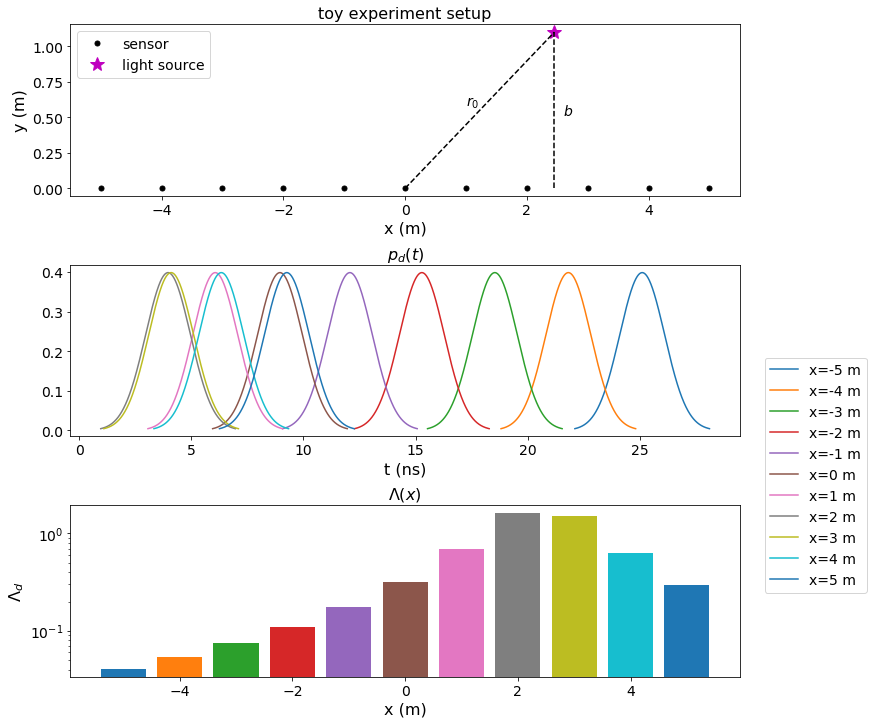

In [8]:
fig, axes = plt.subplots(3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.4)

plot_experiment(axes[0], example_b_src, example_x_src)
plot_expected_t_dists(axes[1], toy_experiment, example_x_src, example_b_src, example_N_src)
plot_expected_lamda_ds(axes[2], toy_experiment, example_x_src, example_b_src, example_N_src)

### Event generation code

In [9]:
# generate one event and plot it
Ns, ts = toy_experiment.generate_event(x_src=example_x_src, b=example_b_src, N_src=example_N_src)

In [10]:
def plot_event(Ns, ts, plot_expected=False,
               t_src=None, x_src=None, b_src=None, N_src=None):
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
    plt.subplots_adjust(hspace=0.4)
    
    flat_axes = axes.flat
    
    ax = next(flat_axes)
    ts = np.array(ts)
    
    ax.set_title('hit times')
    ax.set_xlabel('t (ns)')
    

    ax.bar(ts[:,0], [0.25]*ts.shape[0], width=0.1)
    if plot_expected:
        plot_expected_t_dists(ax, toy_experiment, x_src, b_src, N_src)

    ax.set_yticklabels([])
    
    ax = next(flat_axes)
    
    for N, x_det in zip(Ns[:,0], Ns[:,1]):
        ax.bar([x_det], [N], label=f'x={x_det:.0f} m')
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.75))
        
    if plot_expected:
        
        plot_expected_lamda_ds(ax, toy_experiment, x_src, b_src, N_src, color='gray', alpha=0.3)
        

        
    ax.set_xlim(toy_experiment.detector_xs[0]-0.5, toy_experiment.detector_xs[-1] + 0.5)
        
    ax.set_yscale('log')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('$Q_d$')
    ax.set_title('pulses per sensor')

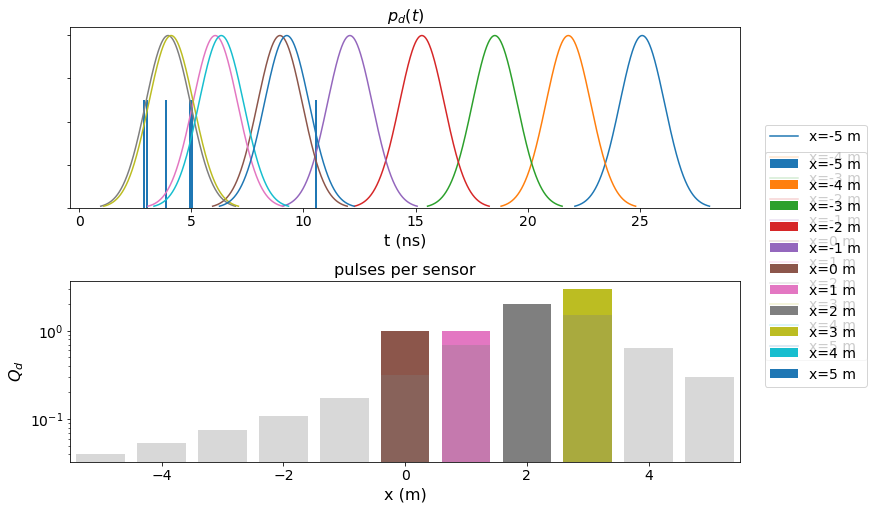

In [11]:
plot_event(Ns, ts, plot_expected=True, x_src=example_x_src, b_src=example_b_src, N_src=example_N_src, t_src=0)

### Generic function for LLH scans

In [12]:
def llh_scan(Ns, ts, param_table):
    '''
    the columns of param_table shall be ordered as follows:
    hypo_xs, hypo_bs, hypo_ts, hypo_n_srcs
    
    Returns:
    
    dom_hit_terms: np.array
    
    dom_charge_terms: np.array
    
    total_charge_hit_terms: np.array
    
    total_charge_terms: np.array

    '''
    n_params = len(param_table)
    
    dom_hit_terms = np.empty(n_params)
    dom_charge_terms = np.empty(n_params)
    total_charge_hit_terms = np.empty(n_params)
    total_charge_terms = np.empty(n_params)
    
    # store -llhs, multiply everything by -1
    for i in range(param_table.shape[0]):
        hypo_x, hypo_b, hypo_t, hypo_N_src = param_table[i, :]
        dom_hit_terms[i] = -toy_experiment.dom_hit_term(ts, hypo_x, hypo_b, hypo_t)
        dom_charge_terms[i] = -toy_experiment.dom_charge_term(Ns, hypo_x, hypo_b, hypo_N_src)
        total_charge_hit_terms[i] = -toy_experiment.total_charge_hit_term(ts, hypo_x, hypo_b, hypo_t, hypo_N_src)
        total_charge_terms[i] = -toy_experiment.total_charge_term(Ns, hypo_x, hypo_b, hypo_N_src)
        
    return dom_hit_terms, dom_charge_terms, total_charge_hit_terms, total_charge_terms

# 2d LLH scans

In [13]:
grid_spacing = 100

In [14]:
def map_2d(Ns, ts, inds, steps, 
           base_params=np.array([example_x_src, example_b_src, 0, example_N_src])):
           
    mg = np.meshgrid(*steps)
           
    n_hypotheses = mg[0].size
     
    param_table = np.repeat(base_params[np.newaxis, :], n_hypotheses, axis=0)

    for ind, coord in zip(inds, mg):
        param_table[:, ind] = coord.flat
           
    return llh_scan(Ns, ts, param_table)

In [15]:
xs = np.linspace(-5.5, 5.5, grid_spacing)
bs = np.linspace(-2, 2, grid_spacing)

In [16]:
%%time
llh_pos_scan_res = map_2d(Ns, ts, (0, 1), (xs, bs))

CPU times: user 1.35 s, sys: 67 ms, total: 1.42 s
Wall time: 1.37 s


### 2d plotting functions

In [17]:
def colorbar(mappable):
    # from https://joseph-long.com/writing/colorbars/
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    cbar.ax.tick_params(labelsize=12)
    return cbar

def plot_scan(llh_scan_res, xs, ys, true_x, true_y, axis_labels, vmaxes):
    # copy to avoid modifying original scan results
    dom_hits, dom_charge, total_hits, total_charge = np.copy(llh_scan_res)
    
    dom_terms = dom_hits, dom_charge
    
    charge_terms = total_hits, total_charge
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
    plt.subplots_adjust(hspace=0.3)
    plt.subplots_adjust(wspace=0.5)
    
    gridsize = len(xs)
    
    flat_axes = axes.flat
    
    for terms, label in zip((dom_terms, charge_terms), ('DOM', 'total charge')):
        ax = next(flat_axes)
        
        # subtract minimum value from each scan result
        for term in terms:
            term[:] -= term.min()
        
        m = ax.pcolormesh(xs, ys, terms[0].reshape(gridsize, gridsize), 
                          cmap='Spectral', rasterized=True, linewidth=0, vmin=0, vmax=vmaxes[0])
        
        ax.plot([true_x], [true_y], marker='$T$', markersize=10, color='white')
        
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])
        ax.set_title(f'{label} hit term')
        colorbar(m)
        
        ax = next(flat_axes)
        m = ax.pcolormesh(xs, ys, terms[1].reshape(gridsize, gridsize), 
                          cmap='Spectral', rasterized=True, linewidth=0, vmin=0, vmax=vmaxes[1])
        ax.plot([true_x], [true_y], marker='$T$', markersize=10, color='white')
        
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])
        ax.set_title(f'{label} Poisson term')
        colorbar(m)
        
        ax = next(flat_axes)
        sum_term = terms[0]+terms[1]
        sum_term = sum_term - sum_term.min()
        m = ax.pcolormesh(xs, ys, sum_term.reshape(gridsize, gridsize), 
                          cmap='Spectral', rasterized=True, linewidth=0, vmin=0, vmax=vmaxes[2])
        ax.plot([true_x], [true_y], marker='$T$', markersize=10, color='white')
        
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])
        ax.set_title(f'{label} combined llh')
        colorbar(m)

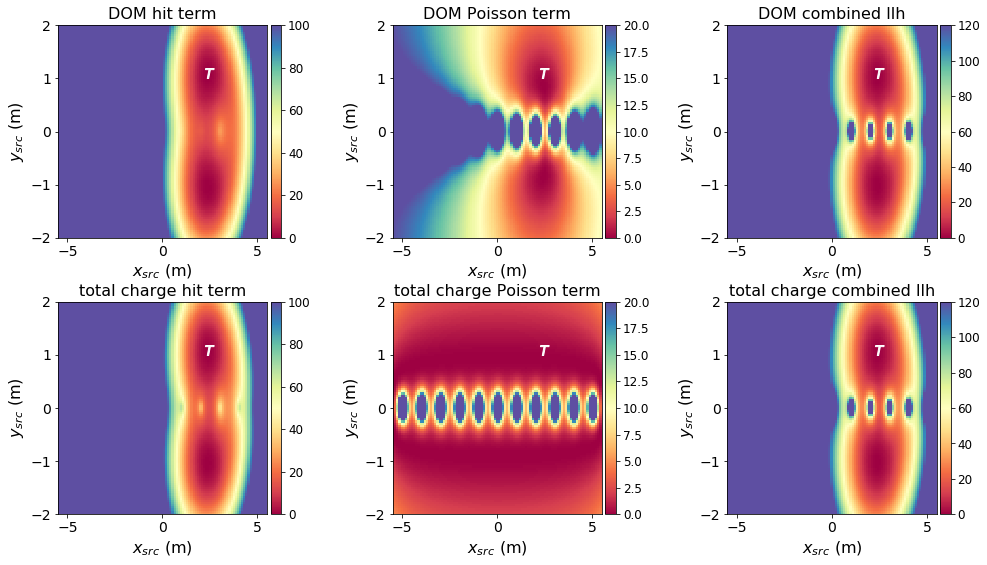

In [18]:
plot_scan(llh_pos_scan_res, xs, bs, example_x_src, example_b_src,
                   axis_labels=['$x_{src}$ (m)', '$y_{src}$ (m)'], vmaxes=[100, 20, 120])

### Verify that the two formulations are giving the same result

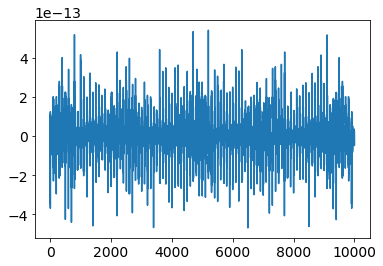

In [19]:
plt.plot(llh_pos_scan_res[0]+llh_pos_scan_res[1] - llh_pos_scan_res[2] - llh_pos_scan_res[3])

Close enough

### next, scan b and energy

In [20]:
N_srcs = np.linspace(0.01, 5, grid_spacing)
N_srcs_bs = np.linspace(-0.5, 2, grid_spacing)

In [21]:
%%time
E_b_scan_res = map_2d(Ns, ts, (1, 3), (N_srcs_bs, N_srcs))

CPU times: user 1.35 s, sys: 41.6 ms, total: 1.39 s
Wall time: 1.36 s


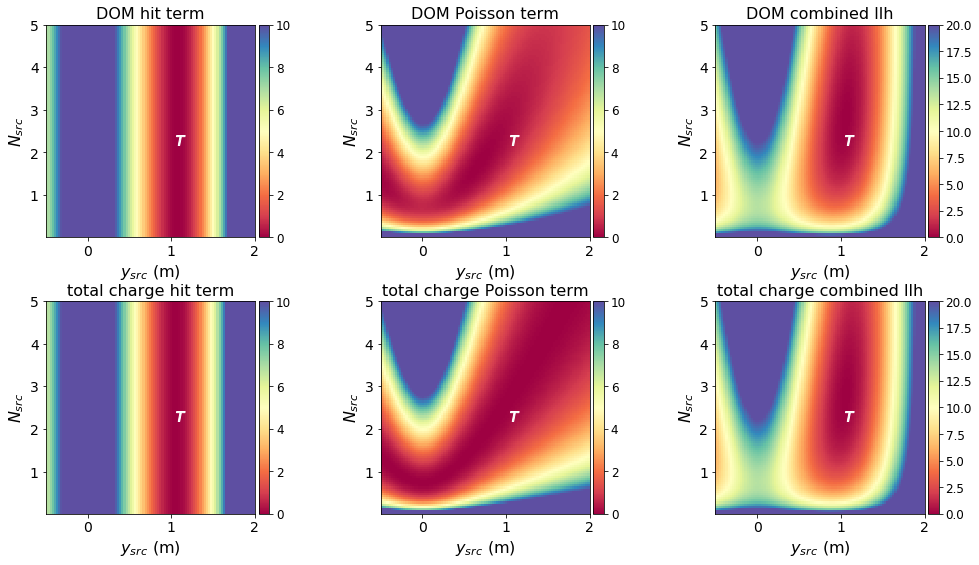

In [22]:
plot_scan(E_b_scan_res, N_srcs_bs, N_srcs, example_b_src, example_N_src,
                   axis_labels=['$y_{src}$ (m)', '$N_{src}$'], vmaxes=[10, 10, 20])

### Verify that the two formulations are giving the same result

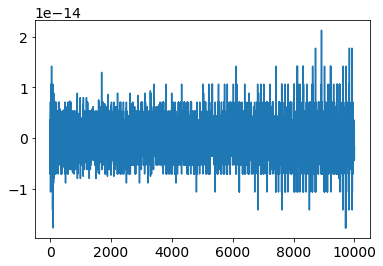

In [23]:
plt.plot(E_b_scan_res[0]+E_b_scan_res[1] - E_b_scan_res[2] - E_b_scan_res[3])

Close enough

In [24]:
%%time
events = toy_experiment.generate_events(int(1e5), N_lims=(0, 20))

CPU times: user 14min 22s, sys: 1.16 s, total: 14min 23s
Wall time: 14min 23s


In [25]:
mc, truth = events

In [26]:
charges = []
for item in mc:
    charges.append(item[0])

In [27]:
charges = np.concatenate(charges)

In [28]:
theta = np.repeat(truth, len(toy_experiment.detector_xs), axis=0)

In [29]:
charges.shape

(1100000, 3)

In [30]:
theta.shape

(1100000, 3)

In [31]:
#np.save("charges_test.npy", charges)
#np.save("charges_test_truths.npy", theta)

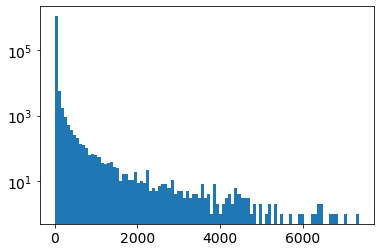

In [32]:
plt.hist(charges[:,0], bins=100)
plt.gca().set_yscale('log')

# NN

In [33]:
#charges = np.load('charges_test.npy')
#theta = np.load('charges_test_truths.npy')

In [34]:
r2 = np.square(theta[:,0] - charges[:,1]) + np.square(theta[:,1])

In [35]:
exp = theta[:,2] / (r2 + 0.05**2)

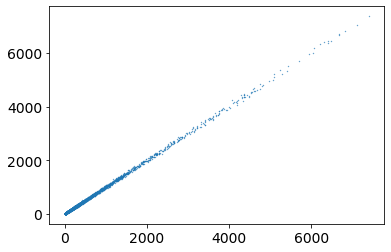

In [36]:
plt.scatter(exp, charges[:,0], s=0.1)

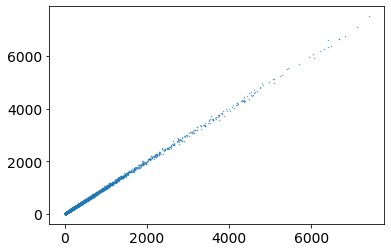

In [37]:
plt.scatter(exp, stats.poisson.rvs(mu=exp), s=0.1)

In [38]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [191]:
def get_dataset(x, t, shuffle_block_size=2**15, batch_size=2**12, test=False):
        '''
        get a tensorflow dataset for likelihood approximation
        
        Parameters:
        -----------
        x : ndarray
            observations
        t : ndarray
            parameters        
        shuffle_block_size : int
            block size over which to shuffle, should be multiple of batch_size
        batch_size : int
        test : bool
            no shuffling, prefetching and caching
        
        Returns:
        --------
        
        tf.data.Dataset
            with structure ((x, t), y) for training
        
        '''
        
        N = x.shape[0]
        assert t.shape[0] == N
        
        d_x = tf.data.Dataset.from_tensor_slices(x)
        d_t = tf.data.Dataset.from_tensor_slices(t)

        d_true_labels = tf.data.Dataset.from_tensor_slices(np.ones((N, 1), dtype=x.dtype))
        d_false_labels = tf.data.Dataset.from_tensor_slices(np.zeros((N, 1), dtype=x.dtype))

        d_xs = tf.data.Dataset.from_tensor_slices([d_x, d_x]).interleave(lambda x : x)
        d_ts = tf.data.Dataset.from_tensor_slices([d_t, d_t.shuffle(shuffle_block_size)]).interleave(lambda x : x)
        d_ys = tf.data.Dataset.from_tensor_slices([d_true_labels, d_false_labels]).interleave(lambda x : x)
        
        
        dataset = tf.data.Dataset.zip((tf.data.Dataset.zip((d_xs, d_ts)), d_ys))
  
        return dataset.batch(batch_size)

In [164]:
x_train, x_test, t_train, t_test = train_test_split(charges, theta, test_size=0.2, random_state=42)

In [192]:
d_train = get_dataset(x_train, t_train)
d_test = get_dataset(x_test, t_test, test=True)

In [193]:
class trafo(tf.keras.layers.Layer):

    def call(self, charges, theta):

        
        r2 = tf.math.square(theta[:,0] - charges[:,1]) + tf.math.square(theta[:,1])
        
        out = tf.stack([
                 charges[:,0],
                 charges[:,1],
                 charges[:,2],
                 r2,
                 theta[:,0],
                 theta[:,1],
                 theta[:,2]
                ],
                axis=1
                )    
            
        return out

In [194]:
#activation=tfa.activations.mish
activation='relu'


x_input = tf.keras.Input(shape=(x_train.shape[1],))
t_input = tf.keras.Input(shape=(t_train.shape[1],))

h = trafo()(x_input, t_input)
h = tf.keras.layers.Dense(32, activation=activation)(h)
h = tf.keras.layers.Dropout(0.01)(h)

h = tf.keras.layers.Dense(64, activation=activation)(h)
h = tf.keras.layers.Dropout(0.01)(h)

h = tf.keras.layers.Dense(128, activation=activation)(h)
h = tf.keras.layers.Dropout(0.01)(h)

h = tf.keras.layers.Dense(64, activation=activation)(h)
h = tf.keras.layers.Dropout(0.01)(h)


h = tf.keras.layers.Dense(32, activation=activation)(h)
h = tf.keras.layers.Dropout(0.01)(h)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(h)

model = tf.keras.Model(inputs=[x_input, t_input], outputs=outputs)
model.summary()

loss_history = []
val_loss_history = []

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 3)]          0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           [(None, 3)]          0                                            
__________________________________________________________________________________________________
trafo_11 (trafo)                (None, 7)            0           input_23[0][0]                   
__________________________________________________________________________________________________
dense_72 (Dense)                (None, 32)           256         trafo_11[0][0]                   
___________________________________________________________________________________________

In [195]:
optimizer = tf.keras.optimizers.Adam(0.001)
#optimizer = tf.keras.optimizers.SGD(0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [196]:
hist = model.fit(d_train, epochs=15, verbose=1, validation_data=d_test,)

Epoch 1/15
430/430 [==============================] - 7s 17ms/step - loss: 0.5642 - val_loss: 0.5274
Epoch 2/15
430/430 [==============================] - 7s 16ms/step - loss: 0.5331 - val_loss: 0.5273
Epoch 3/15
430/430 [==============================] - 7s 16ms/step - loss: 0.5282 - val_loss: 0.5226
Epoch 4/15
430/430 [==============================] - 7s 16ms/step - loss: 0.5250 - val_loss: 0.5210
Epoch 5/15
430/430 [==============================] - 7s 16ms/step - loss: 0.5239 - val_loss: 0.5199
Epoch 6/15
430/430 [==============================] - 7s 16ms/step - loss: 0.5235 - val_loss: 0.5183
Epoch 7/15
430/430 [==============================] - 7s 16ms/step - loss: 0.5221 - val_loss: 0.5193
Epoch 8/15
430/430 [==============================] - 7s 16ms/step - loss: 0.5213 - val_loss: 0.5187
Epoch 9/15
430/430 [==============================] - 7s 16ms/step - loss: 0.5211 - val_loss: 0.5193
Epoch 10/15
430/430 [==============================] - 7s 17ms/step - loss: 0.5215 - val_lo

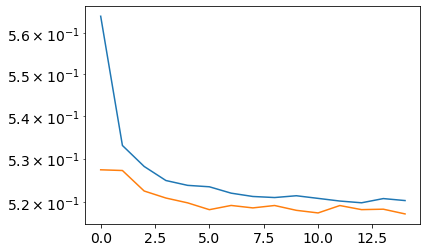

In [197]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.gca().set_yscale('log')

In [198]:
linmodel = tf.keras.models.clone_model(model)
linmodel.set_weights(model.get_weights())
linmodel.layers[-1].activation = tf.keras.activations.linear
linmodel.compile()

In [199]:
import dragoman as dm

In [200]:
#g = dm.GridData(x=np.linspace(-6,6,100), b=np.linspace(-3,3,100))
g = dm.GridData(x=xs, b=bs)

In [201]:
tt = np.vstack([g.get_array('x', flat=True), g.get_array('b', flat=True), np.ones(np.prod(g.shape)) * example_N_src]).T

In [202]:
tts = np.repeat(tt, Ns.shape[0], axis=0)

In [203]:
xxs = np.repeat(Ns[np.newaxis,:, :], np.prod(g.shape), axis=0)

In [204]:
xxs = xxs.reshape(-1, 3)

In [205]:
llhs = linmodel.predict([xxs, tts])    

In [206]:
g['llh'] = -np.sum(llhs.reshape(-1, 11), axis=1).reshape(g.shape)
g['llh'] -= np.min(g['llh'])
#g['llh'] = (llhs.reshape(-1, 11)[:,-2]).reshape(g.shape)

In [207]:
g['ana'] = llh_pos_scan_res[1].reshape(g.shape).T
g['ana'] -= np.min(g['ana'])

Text(0.5, 1.0, 'diff')

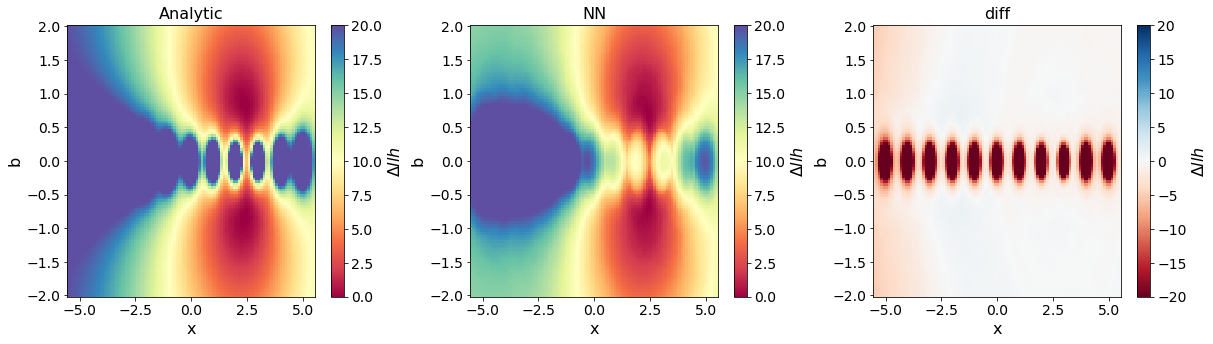

In [210]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)

vmax=20

g['ana'].plot(ax=ax[0], cmap='Spectral', cbar=True, vmax=vmax, label=r'$\Delta llh$')
ax[0].set_title('Analytic')
g['llh'].plot(ax=ax[1], cmap='Spectral', cbar=True, vmax=vmax, label=r'$\Delta llh$')
ax[1].set_title('NN')
(g['llh'] - g['ana']).plot(ax=ax[2], cmap='RdBu', cbar=True, vmin=-20, vmax=20, label=r'$\Delta llh$')
ax[2].set_title('diff')

#plt.savefig('DOMnet_test.png', bbox_inches='tight')